<a href="https://colab.research.google.com/github/duypham01/SAR_DRN/blob/master/Load_Test_MODEL_SAR_DRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
import cv2
#import scipy
import matplotlib.pyplot as plt
import math

from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, Input, Dense, Add, Lambda
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from scipy import ndimage
import tensorflow as tf
import keras as keras
from keras.models import load_model
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_psnr as psnr
from keras.losses import MeanSquaredError

In [0]:
def speckle(img):
    severity = np.random.uniform(0, 0.6)
    blur = ndimage.gaussian_filter(np.random.randn(*img.shape) * severity, 1)
    img_speck = (img + blur)
    img_speck[img_speck > 1] = 1
    img_speck[img_speck <= 0] = 0
    return img_speck

In [0]:
def reImg(img):
    img_new = img
    img_new[img_new > 1] = 1
    img_new[img_new <= 0] = 0
    return img_new

(256, 256)
[[119 121 126 ... 128 125 124]
 [118 122 128 ... 127 125 131]
 [119 124 129 ... 127 126 134]
 ...
 [106 104  99 ... 152 150 144]
 [118 117 116 ... 151 151 147]
 [ 89  81  87 ... 146 147 150]]


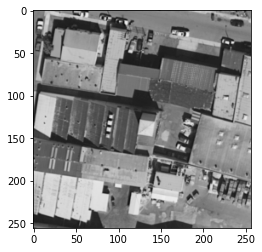

In [3]:
img = image.load_img("./drive/My Drive/UCMerced_LandUse/UCMerced_LandUse/Images/buildings/buildings88.tif", color_mode="grayscale")
img = np.asarray(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print(img.shape)
print(img)
plt.show()

In [5]:
img = cv2.resize(img, (256, 256))
#img = np.asarray(img)
img = img.astype('float32')
img = img/255.0

print(img.shape)
print(img)

(256, 256)
[[0.46666667 0.4745098  0.49411765 ... 0.5019608  0.49019608 0.4862745 ]
 [0.4627451  0.47843137 0.5019608  ... 0.49803922 0.49019608 0.5137255 ]
 [0.46666667 0.4862745  0.5058824  ... 0.49803922 0.49411765 0.5254902 ]
 ...
 [0.41568628 0.40784314 0.3882353  ... 0.59607846 0.5882353  0.5647059 ]
 [0.4627451  0.45882353 0.45490196 ... 0.5921569  0.5921569  0.5764706 ]
 [0.34901962 0.31764707 0.34117648 ... 0.57254905 0.5764706  0.5882353 ]]


In [9]:
img_noise = speckle(img)
print(img_noise)

[[0.5375106  0.53996768 0.55746087 ... 0.57176853 0.65113402 0.68729366]
 [0.53837091 0.55112402 0.54319336 ... 0.58927826 0.58922092 0.62911453]
 [0.52214626 0.55226926 0.52445933 ... 0.5915331  0.55673815 0.59535525]
 ...
 [0.52110399 0.52977684 0.49982782 ... 0.67937746 0.69470146 0.68107226]
 [0.61936157 0.54077428 0.48071841 ... 0.59779946 0.63829354 0.59504656]
 [0.46445207 0.33262231 0.30442133 ... 0.55121335 0.59164158 0.50645625]]


[[137 137 142 ... 145 166 175]
 [137 140 138 ... 150 150 160]
 [133 140 133 ... 150 141 151]
 ...
 [132 135 127 ... 173 177 173]
 [157 137 122 ... 152 162 151]
 [118  84  77 ... 140 150 129]]


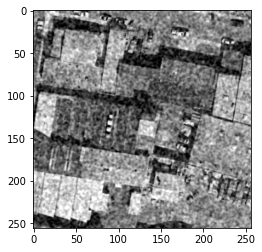

In [10]:
img_noise_256 = img_noise*255.0
img_noise_256 = img_noise_256.astype('int32')
print(img_noise_256)
plt.imshow(img_noise_256, cmap='gray', vmin=0, vmax=255)
plt.show()

In [11]:
img_noise_to_pred = img_noise.reshape(1,256, 256, 1)
print(img_noise_to_pred.shape)

(1, 256, 256, 1)


In [12]:
model = load_model("./drive/My Drive/Colab Notebooks/SAR_DRN.h5")
print(model.summary())

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 256, 256, 64) 640         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_64[0][0]                  
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_65[0][0]                  
___________________________________________________________________________________________

In [13]:
pred = model.predict(img_noise_to_pred)
print(pred.shape)
print(pred)
pred = pred.reshape(256,256)

pred_img = img - pred
pred_img = reImg(pred_img)
print(pred_img.shape)
print(pred_img)

(1, 256, 256, 1)
[[[[-0.0202313 ]
   [-0.00988755]
   [-0.00746915]
   ...
   [ 0.0034542 ]
   [ 0.02154306]
   [ 0.00921676]]

  [[ 0.01137423]
   [ 0.02222509]
   [ 0.02144933]
   ...
   [ 0.04014839]
   [ 0.05524842]
   [ 0.00352791]]

  [[ 0.00709721]
   [ 0.0141215 ]
   [ 0.01318815]
   ...
   [ 0.02079275]
   [ 0.02402371]
   [-0.01055368]]

  ...

  [[ 0.02327593]
   [ 0.06409837]
   [ 0.04252252]
   ...
   [ 0.02240594]
   [ 0.04798827]
   [ 0.01315142]]

  [[ 0.0310393 ]
   [ 0.05632659]
   [ 0.03115305]
   ...
   [ 0.03151775]
   [ 0.0515994 ]
   [ 0.01061742]]

  [[ 0.01881338]
   [ 0.01117019]
   [-0.00681132]
   ...
   [ 0.0025334 ]
   [ 0.00887436]
   [-0.00866559]]]]
(256, 256)
[[0.48689798 0.48439735 0.5015868  ... 0.4985066  0.46865302 0.47705775]
 [0.45137087 0.4562063  0.4805115  ... 0.45789084 0.43494767 0.51019764]
 [0.45956945 0.472153   0.49269423 ... 0.47724646 0.47009394 0.5360439 ]
 ...
 [0.39241034 0.34374475 0.34571278 ... 0.57367253 0.5402471  0.5515545 ]
 

[[124 123 127 ... 127 119 121]
 [115 116 122 ... 116 110 130]
 [117 120 125 ... 121 119 136]
 ...
 [100  87  88 ... 146 137 140]
 [110 102 108 ... 142 137 144]
 [ 84  78  88 ... 145 144 152]]


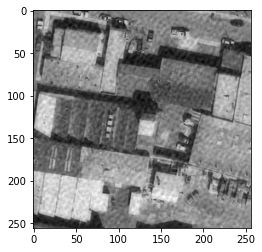

In [16]:
pred_256 = pred_img*255.0
pred_256 = pred_256.astype('int32')
print(pred_256)
plt.imshow(pred_256, cmap='gray', vmin=0, vmax=255)
plt.show()

In [15]:
mse = MeanSquaredError()
errPSNRImg_img_noise = psnr(img, img_noise)
errPSNRImg_img_pred = psnr(img, pred_img)
errSSIMImg_img_noise = ssim(img, img_noise)
errSSIMImg_img_pred = ssim(img, pred_img)
errMSEImg_img_noise = mse(img, img_noise)
errMSEImg_img_pred = mse(img, pred_img)
print(errPSNRImg_img_noise)
print(errPSNRImg_img_pred)
print(errSSIMImg_img_noise)
print(errSSIMImg_img_pred)
print(errMSEImg_img_noise.numpy())
print(errMSEImg_img_pred.numpy())

20.63640370991902
26.205628792236887
0.6331832465007008
0.8340022938335855
0.008636935
0.0023957258


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/skimage/measure/simple_metrics.py:65: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(im_true, im_test, data_range=data_range)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure 